# Agent Handover Replicator Implementation

For our implementation, we have broken down the problem into a smaller sub-problem. This sub-problem involves the coordination between Type A agents and Type B agents to find a suitable spot on the grid for handover. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Payoff calculation function based on reward structure stated in RL model implementation
def payoff_calculator(agents):
    agent_1 = list(agents[0])
    agent_2 = list(agents[1])
    # Setting pickup and delivery location on the grid
    pickup_x = 0
    pickup_y = 4
    deliver_x = 4
    deliver_y = 0
    # Reward for handover adapted from RL model implementation
    agent_1[2] = 34 - ((abs(agent_1[0] - pickup_x) + abs(agent_1[1] - pickup_y))**2 + (abs(agent_1[0] - deliver_x) + abs(agent_1[1] - deliver_y))**2)
    agent_2[2] = 34 - ((abs(agent_2[0] - pickup_x) + abs(agent_2[1] - pickup_y))**2 + (abs(agent_2[0] - deliver_x) + abs(agent_2[1] - deliver_y))**2)
    # Set handover flag to True
    agent_1[3] = True
    agent_2[3] = True
    return tuple(agent_1), tuple(agent_2)


In [3]:
def population_evolution (type_1_agents,type_2_agents):
    
    # Calculate the total payoff across type_1_agents list, when negative payoff is encountered, use 0.1 instead 
    type_1_payoffs = np.array([max(0.1, agent[2]) for agent in type_1_agents])

    # Calculate the sum of all payoffs
    type_1_total_payoffs = np.sum(type_1_payoffs)

    # Randomly choose indexes based on probability assigned (according to its payoff proportional to the total payoff). This code is inspired from the Carpark problem 
    type_1_indexes = np.random.choice(np.arange(0, len(type_1_agents)), len(type_1_agents), replace=True, p= type_1_payoffs / type_1_total_payoffs)

    # Repopulate Agents based on the indexes chosen above.
    type_1_agents = [type_1_agents[i] for i in type_1_indexes]
    

    # Calculate the total payoff across type_2_agents list, when negative payoff is encountered, use 0.1 instead 
    type_2_payoffs = np.array([max(0.1, agent[2]) for agent in type_2_agents])

    # Calculate the sum of all payoffs
    type_2_total_payoffs = np.sum(type_2_payoffs)

    # Randomly choose indexes based on probability assigned (according to its payoff proportional to the total payoff). This code is inspired from the Carpark problem 
    type_2_indexes = np.random.choice(np.arange(0, len(type_2_agents)), len(type_2_agents), replace=True, p= type_2_payoffs / type_2_total_payoffs)

    # Repopulate Agents based on the indexes chosen above.
    type_2_agents = [type_2_agents[i] for i in type_2_indexes]

    # Reset handover check flags for all agents
    type_1_agents = [(x, y, z,False) for x, y, z, f in type_1_agents]
    type_2_agents = [(x, y, z,False) for x, y, z, f in type_2_agents]
    
    return type_1_agents,type_2_agents

In [4]:
#Visualisation MatPlotLib code partially adapted from code provided by ChatGPT
def visualize_proportion (grid):
    grid_width = 5
    grid_height = 5
    # Count the number of A1 and A2 agents in each cell
    counts = [[f"A1: {cell.count('A1')}, A2: {cell.count('A2')}" if cell else '' for cell in row] for row in grid]

    # Create a plot for visualizing the grid
    fig, ax = plt.subplots(figsize=(6, 6))
    for y in range(grid_height + 1):
        ax.plot([0, grid_width], [y, y], color='black', linewidth=1)  # Horizontal grid lines
    for x in range(grid_width + 1):
        ax.plot([x, x], [0, grid_height], color='black', linewidth=1)  # Vertical grid lines

    for y in range(grid_height):
        for x in range(grid_width):
            x = grid_width - 1 - x 
            cell_data = counts[x][y]
            if cell_data:
                ax.text(x + 0.5, y + 0.5, cell_data, va='center', ha='center', fontsize=6)

    ax.set_xticks(range(grid_width))
    ax.set_yticks(range(grid_height))
    
    # Set x and y axis labels to represent axis coordinates with padding
    ax.set_xticklabels(range(grid_width))
    ax.set_yticklabels(range(grid_height))

    # Add padding to x-axis and y-axis labels
    ax.xaxis.labelpad = 10  # Add padding to x-axis labels
    ax.yaxis.labelpad = 10  # Add padding to y-axis labels
    
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_frame_on(False)

    # Set the title to "Proportion of Handover Locations"
    ax.set_title("Proportion population's handover locations")

    plt.grid(visible=False)  # Turn off the default grid lines
    plt.xlabel("X Coordinate")  # Add x-axis label
    plt.ylabel("Y Coordinate")  # Add y-axis label
    plt.show()

In [5]:
#Visualisation MatPlotLib code partially adapted from code provided by ChatGPT
def plot_evolutions (type_1_proportions_over_time,type_2_proportions_over_time,grid_positions):
    grid_width = 5
    grid_height = 5
    # Create a plot for each cell
    fig, ax = plt.subplots()
    for cell_index, cell_proportions in enumerate(type_1_proportions_over_time[0]):
        x, y = grid_positions[cell_index]
#         x = grid_width - 1 - x 
        cell_label = f"Cell ({x},{y})"  # Create a label for the cell

        # Extract proportions for the cell over the two iterations
        cell_proportions_over_time = [proportions[cell_index] for proportions in type_1_proportions_over_time]
        # Plot the proportions over time
        ax.plot(range(len(type_1_proportions_over_time)), cell_proportions_over_time, label=f"Cell ({x},{y})")
        ax.text(len(type_1_proportions_over_time) - 1, cell_proportions_over_time[-1], f"Cell ({x},{y})")

    # Set labels and legend
    plt.xlabel('Iterations')
    plt.ylabel("Proportion population's handover locations")
    plt.title('Type 1 Agent Proportions Of Handover Over Time for Each Cell')
    plt.legend([f"Cell ({x},{y})" for x in range(grid_width) for y in range(grid_height)], loc='center left', bbox_to_anchor=(1.25, 0.5))

    # Show the plot
    plt.show()
    
    fig, ax = plt.subplots()
    for cell_index, cell_proportions in enumerate(type_2_proportions_over_time[0]):
        x, y = grid_positions[cell_index]
#         x = grid_width - 1 - x 
        cell_label = f"Cell ({x},{y})"  # Create a label for the cell

        # Extract proportions for the cell over the two iterations
        cell_proportions_over_time = [proportions[cell_index] for proportions in type_2_proportions_over_time]
        # Plot the proportions over time
        ax.plot(range(len(type_2_proportions_over_time)), cell_proportions_over_time, label=f"Cell ({x},{y})")
        ax.text(len(type_2_proportions_over_time) - 1, cell_proportions_over_time[-1], f"Cell ({x},{y})")

    # Set labels and legend
    plt.xlabel('Iterations')
    plt.ylabel("Proportion population's handover locations")
    plt.title('Type 2 Agent Proportions Of Handover Over Time for Each Cell')
    plt.legend([f"Cell ({x},{y})" for x in range(grid_width) for y in range(grid_height)], loc='center left', bbox_to_anchor=(1.25, 0.5))

    # Show the plot
    plt.show()

In [6]:
# Main Game Theory Function
def play_game (iterations,population):
    grid_width = 5
    grid_height = 5
    type_1_agents = []
    type_2_agents = []
    
    # Array to keep track of proportion of handover at each grid location over time. 
    type_1_proportions_over_time = [[None] * 25 for _ in range(iterations)]
    type_2_proportions_over_time = [[None] * 25 for _ in range(iterations)]
    
    # Initialise intial population of agent. Each grid space should have an equal amount of agent
    for x in range(grid_width):
        for y in range(grid_height):
            for _ in range(population // 25):
                # State representation of agent: (x coordinate, y coordinate, payoff value, handover flag)
                agent_1 = (x, y, 0,False)
                agent_2 = (x, y, 0,False)
                type_1_agents.append(agent_1)
                type_2_agents.append(agent_2)

    # Looping though the pre-set iteration set previously
    for i in range (iterations):
        grid = [[[] for _ in range(grid_width)] for _ in range(grid_height)]
        
        # Place agents on the grid, allowing multiple agents in the same cell
        for agent in type_1_agents:
            x, y, payoff, flag = agent
            grid[x][y].append('A1')
            
        # Place agents on the grid, allowing multiple agents in the same cell
        for agent in type_2_agents:
            x, y, payoff, flag = agent
            grid[x][y].append('A2') 
        
        # Pair each agent up amongst the agents that are currently in the grid
        paired_elements = []
        for item1 in type_1_agents[:]:
            for item2 in type_2_agents[:]:
                if item1[:2] == item2[:2] and item1[3] == False and item2[3] == False:
                    # Once paired, remove from the list. This will leave us with the leftovers (those that cannot perform handover)
                    # This encourages agents to pair up with each other since those that do not will have 0 payoff
                    paired_elements.append((item1, item2))
                    type_1_agents.remove(item1)
                    type_2_agents.remove(item2)
                    break
        
        # Apply the payoff calculator
        paired_elements = list(map(payoff_calculator, paired_elements))
        
        # Set unpaired payoff to 0 
        type_1_agents = [(x, y, 0,False) for x, y, z, f in type_1_agents]
        type_2_agents = [(x, y, 0,False) for x, y, z, f in type_2_agents]

        # Split the paired type 1 and type 2 agents and add them back to their list.
        for pair in paired_elements:
            item1, item2 = pair
            type_1_agents.append(item1)
            type_2_agents.append(item2)
            
        # evolve current population of agents
        type_1_agents,type_2_agents = population_evolution(type_1_agents,type_2_agents)
        
        grid_positions = [None] * 25
        count = 0
        # Count proportion of agents at each specific grid location, Type 1 and Type 2 has seperate proportion lists. This is used
        # for plotting the evolution graph
        for x in range(grid_width):
            for y in range(grid_height):
                type_1_proportion = 0
                type_1_proportion = 0
                type_1_count = sum(1 for cell in grid[y][x] if cell == 'A1')
                type_2_count = sum(1 for cell in grid[y][x] if cell == 'A2')
                if type_1_count != 0:
                    type_1_proportion = type_1_count / population
                else:
                    type_1_proportion = 0.0
                if type_2_count != 0:
                    type_2_proportion = type_2_count / population
                else:
                    type_2_proportion = 0.0
                type_1_proportions_over_time[i][count]= type_1_proportion
                type_2_proportions_over_time[i][count]= type_2_proportion
                grid_positions[count] = (x,y)
                count += 1
        # Plot number of agents in a grid (uncomment to show proportion change in grid at each timestep) 
#         visualize_proportion (grid)   
        
    # Plot evolutions graph for Type 1 Agent           
    plot_evolutions(type_1_proportions_over_time,type_2_proportions_over_time,grid_positions)
    
    # Plot number of agents in a grid 
    visualize_proportion (grid)



# Brief Justification and Evaluation

The Replicator Dynamics model aims to find the equilibrium point to do the handover action which ideally in diagonal coordinates. **Based on the graph, we can notice that all of the 1000 agents converged to a fixed point whereby they all agree to a single handover strategy that hits the Nash Equilibria.** By the time of meeting Nash Equilibria, no other strategies can dominate the current handover strategy.

**This handling of coordinates is different from our grid world setup. Where the Y starts at 0 from the bottom instead. This means that the current pickup location for Type 1 Agent is at (0,4) and the Type 2 Agent is at (4,0)**

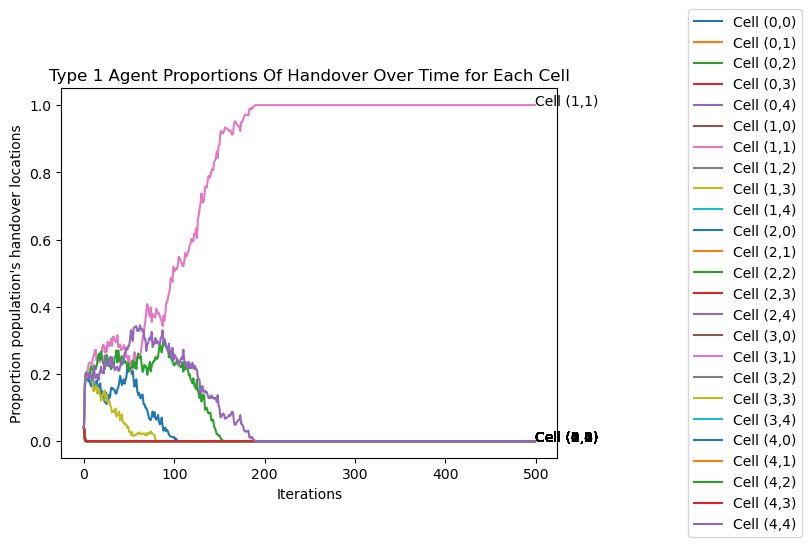

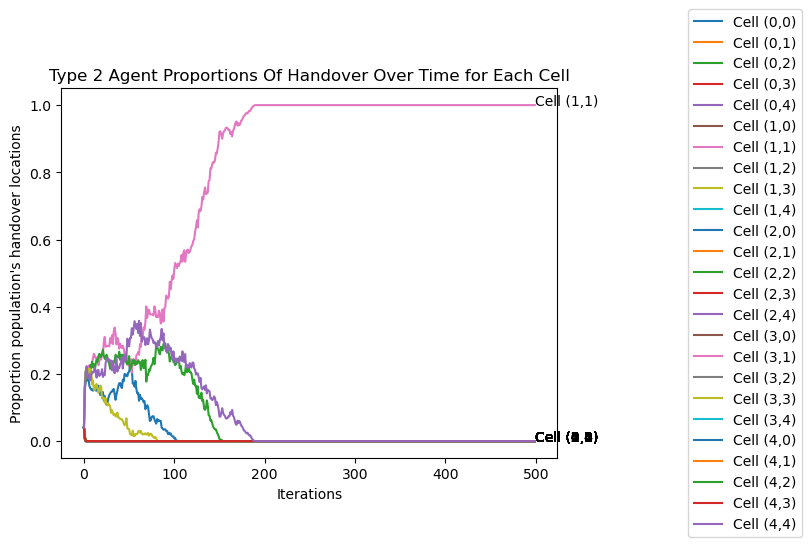

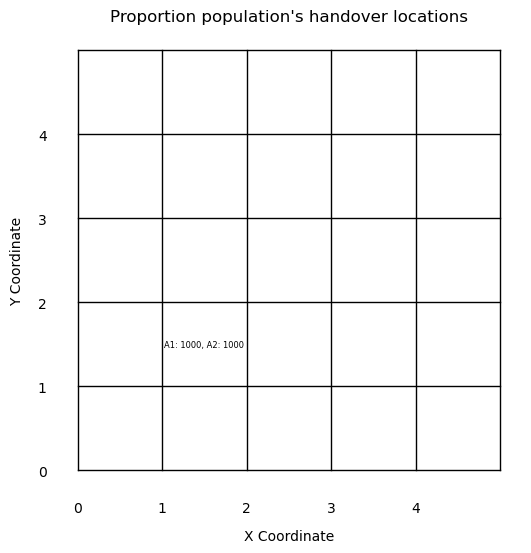

In [7]:
#Main Function of the game. First argument represents the number of iterations to run (usually can complete by 500). 
#The second argument represents the population size.
play_game(500,1000)